In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Set a classic serif font and adjust global styling for academic appearance
mpl.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'figure.dpi': 300,  # High resolution for publication
    'savefig.dpi': 300
})

In [3]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

383


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,89ceb09a69f6dd22d587ad0e1d1161a7f31b166d,coxal-eyas,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,1.0,cok/adapted.txt,cq.txt,manual/cok.json,...,673,102.307578,30.530511,45,83.0,94.0,114.00,239,COK,cok/adapted:cq:manual/cok
1,569fe899f90c8bdaf47866bbb36fc24c88f4925c,sulfa-lame,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,716,94.681564,60.827044,29,59.0,80.0,112.25,873,COT,cot/format-thought:cq:manual/cot
2,98498237a46b9b473706d7f773a27e67e30523d9,wacky-ciao,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,686,52.836735,21.162000,18,39.0,48.0,61.00,177,CTE,cte/format-triples-ere-few:cq:manual/cte-triples
3,288b4a6bb49a305006dc7f891cc0c52cc0b77d0b,tarry-bani,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,643,52.905132,26.209948,16,36.0,46.0,61.50,228,CTE,cte/format-triples-few:cq:manual/cte-triples
4,e3ed6981ac0d21340a3b5eca1e92696a1e7fdd0a,keyed-brig,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.0,cot/format-thought.txt,cq.txt,manual/cot.json,...,709,92.279267,70.008643,23,52.0,75.0,104.00,839,COT,cot/format-thought:cq:manual/cot


In [4]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [5]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,armed-frit,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.561026,0.703903,...,719,72.969402,50.465760,18,41.0,59.0,86.0,493,CCOT,ccot/format-thought:cq:manual/ccot
1,weepy-nave,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.592470,0.712703,...,696,49.435345,16.512611,19,38.0,47.0,58.0,139,CCOT,ccot/format-thought:cq:manual/ccot
2,keyed-huia,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.478693,0.603835,...,995,33.192965,12.277597,14,24.0,31.0,39.0,90,CCOT,ccot/format-thought:cq:manual/ccot
3,stone-rick,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.567646,0.708807,...,709,72.306065,50.375435,18,41.0,58.0,82.0,395,CCOT,ccot/format-thought:cq:manual/ccot
4,heigh-scup,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.595780,0.714878,...,693,49.655123,17.063828,19,38.0,47.0,58.0,165,CCOT,ccot/format-thought:cq:manual/ccot


In [6]:
# find the rows with max f1 score for each technique group
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
11,COK,cok/adapted.txt,cq.txt,manual/cok.json,1,1.0,0.619087,0.739850,0.651092,0.767606,...,104.875000,245.333333,630.166667,105.064628,88.863223,30.166667,79.500000,96.333333,116.666667,1448.333333
29,CTE,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,1,1.0,0.608537,0.731867,0.635783,0.752886,...,50.583333,187.166667,649.666667,53.493429,109.325851,12.666667,34.791667,43.666667,57.000000,2549.500000
15,COT,cot/format-thought.txt,cq.txt,manual/cot.json,1,0.0,0.567646,0.688405,0.603745,0.720946,...,67.111111,252.555556,767.333333,73.953918,63.391444,20.444444,48.444444,64.777778,86.416667,1209.555556
3,CCOT,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,0.0,0.566864,0.687190,0.602680,0.720279,...,50.722222,184.111111,778.222222,53.818003,30.820113,16.333333,36.611111,46.444444,61.666667,397.666667
44,REASONING,direct/format-few.txt,cq.txt,empty.json,0,0.5,0.502551,0.646481,0.540069,0.690582,...,433.750000,3822.000000,896.000000,772.025232,994.063837,107.666667,311.458333,434.250000,830.666667,8178.000000
40,DIRECT,direct/format-few.txt,cq.txt,manual/direct.json,1,0.5,0.514274,0.643112,0.566915,0.689003,...,6.666667,20.555556,890.666667,7.952594,10.034537,3.000000,4.000000,5.000000,8.138889,147.000000


In [7]:
# Extract and prepare the data
efficiency_metrics = [
    "metrics.gen_token_count.success.mean",
    "metrics.gen_token_count.success.std",
    "metrics.gen_token_count.success.min",
    "metrics.gen_token_count.success.max",
]
data = best_df[["params.qa.technique"] + efficiency_metrics].copy()
data.columns = ["Technique", "Mean Tokens", "Std Tokens", "Min Tokens", "Max Tokens"]

# Identify the mean for the "DIRECT" technique
lower_bound = data.loc[data["Technique"] == "DIRECT", "Mean Tokens"].values[0]

# Compute the multiplication factor relative to DIRECT
data["Relative Verbosity Ratio"] = data["Mean Tokens"] / lower_bound

# Sort techniques by RVR
data.sort_values("Relative Verbosity Ratio", inplace=True)
data

,Technique,Mean Tokens,Std Tokens,Min Tokens,Max Tokens,Relative Verbosity Ratio
40,DIRECT,5.910635,2.031928,3.000000,20.555556,1.000000
29,CTE,43.758080,14.506483,15.833333,187.166667,7.403279
3,CCOT,44.385315,15.755185,15.666667,184.111111,7.509399
15,COT,57.218688,21.680784,22.333333,252.555556,9.680633
11,COK,91.950802,25.272564,40.166667,245.333333,15.556839
44,REASONING,434.999023,382.037443,101.833333,3822.000000,73.595986


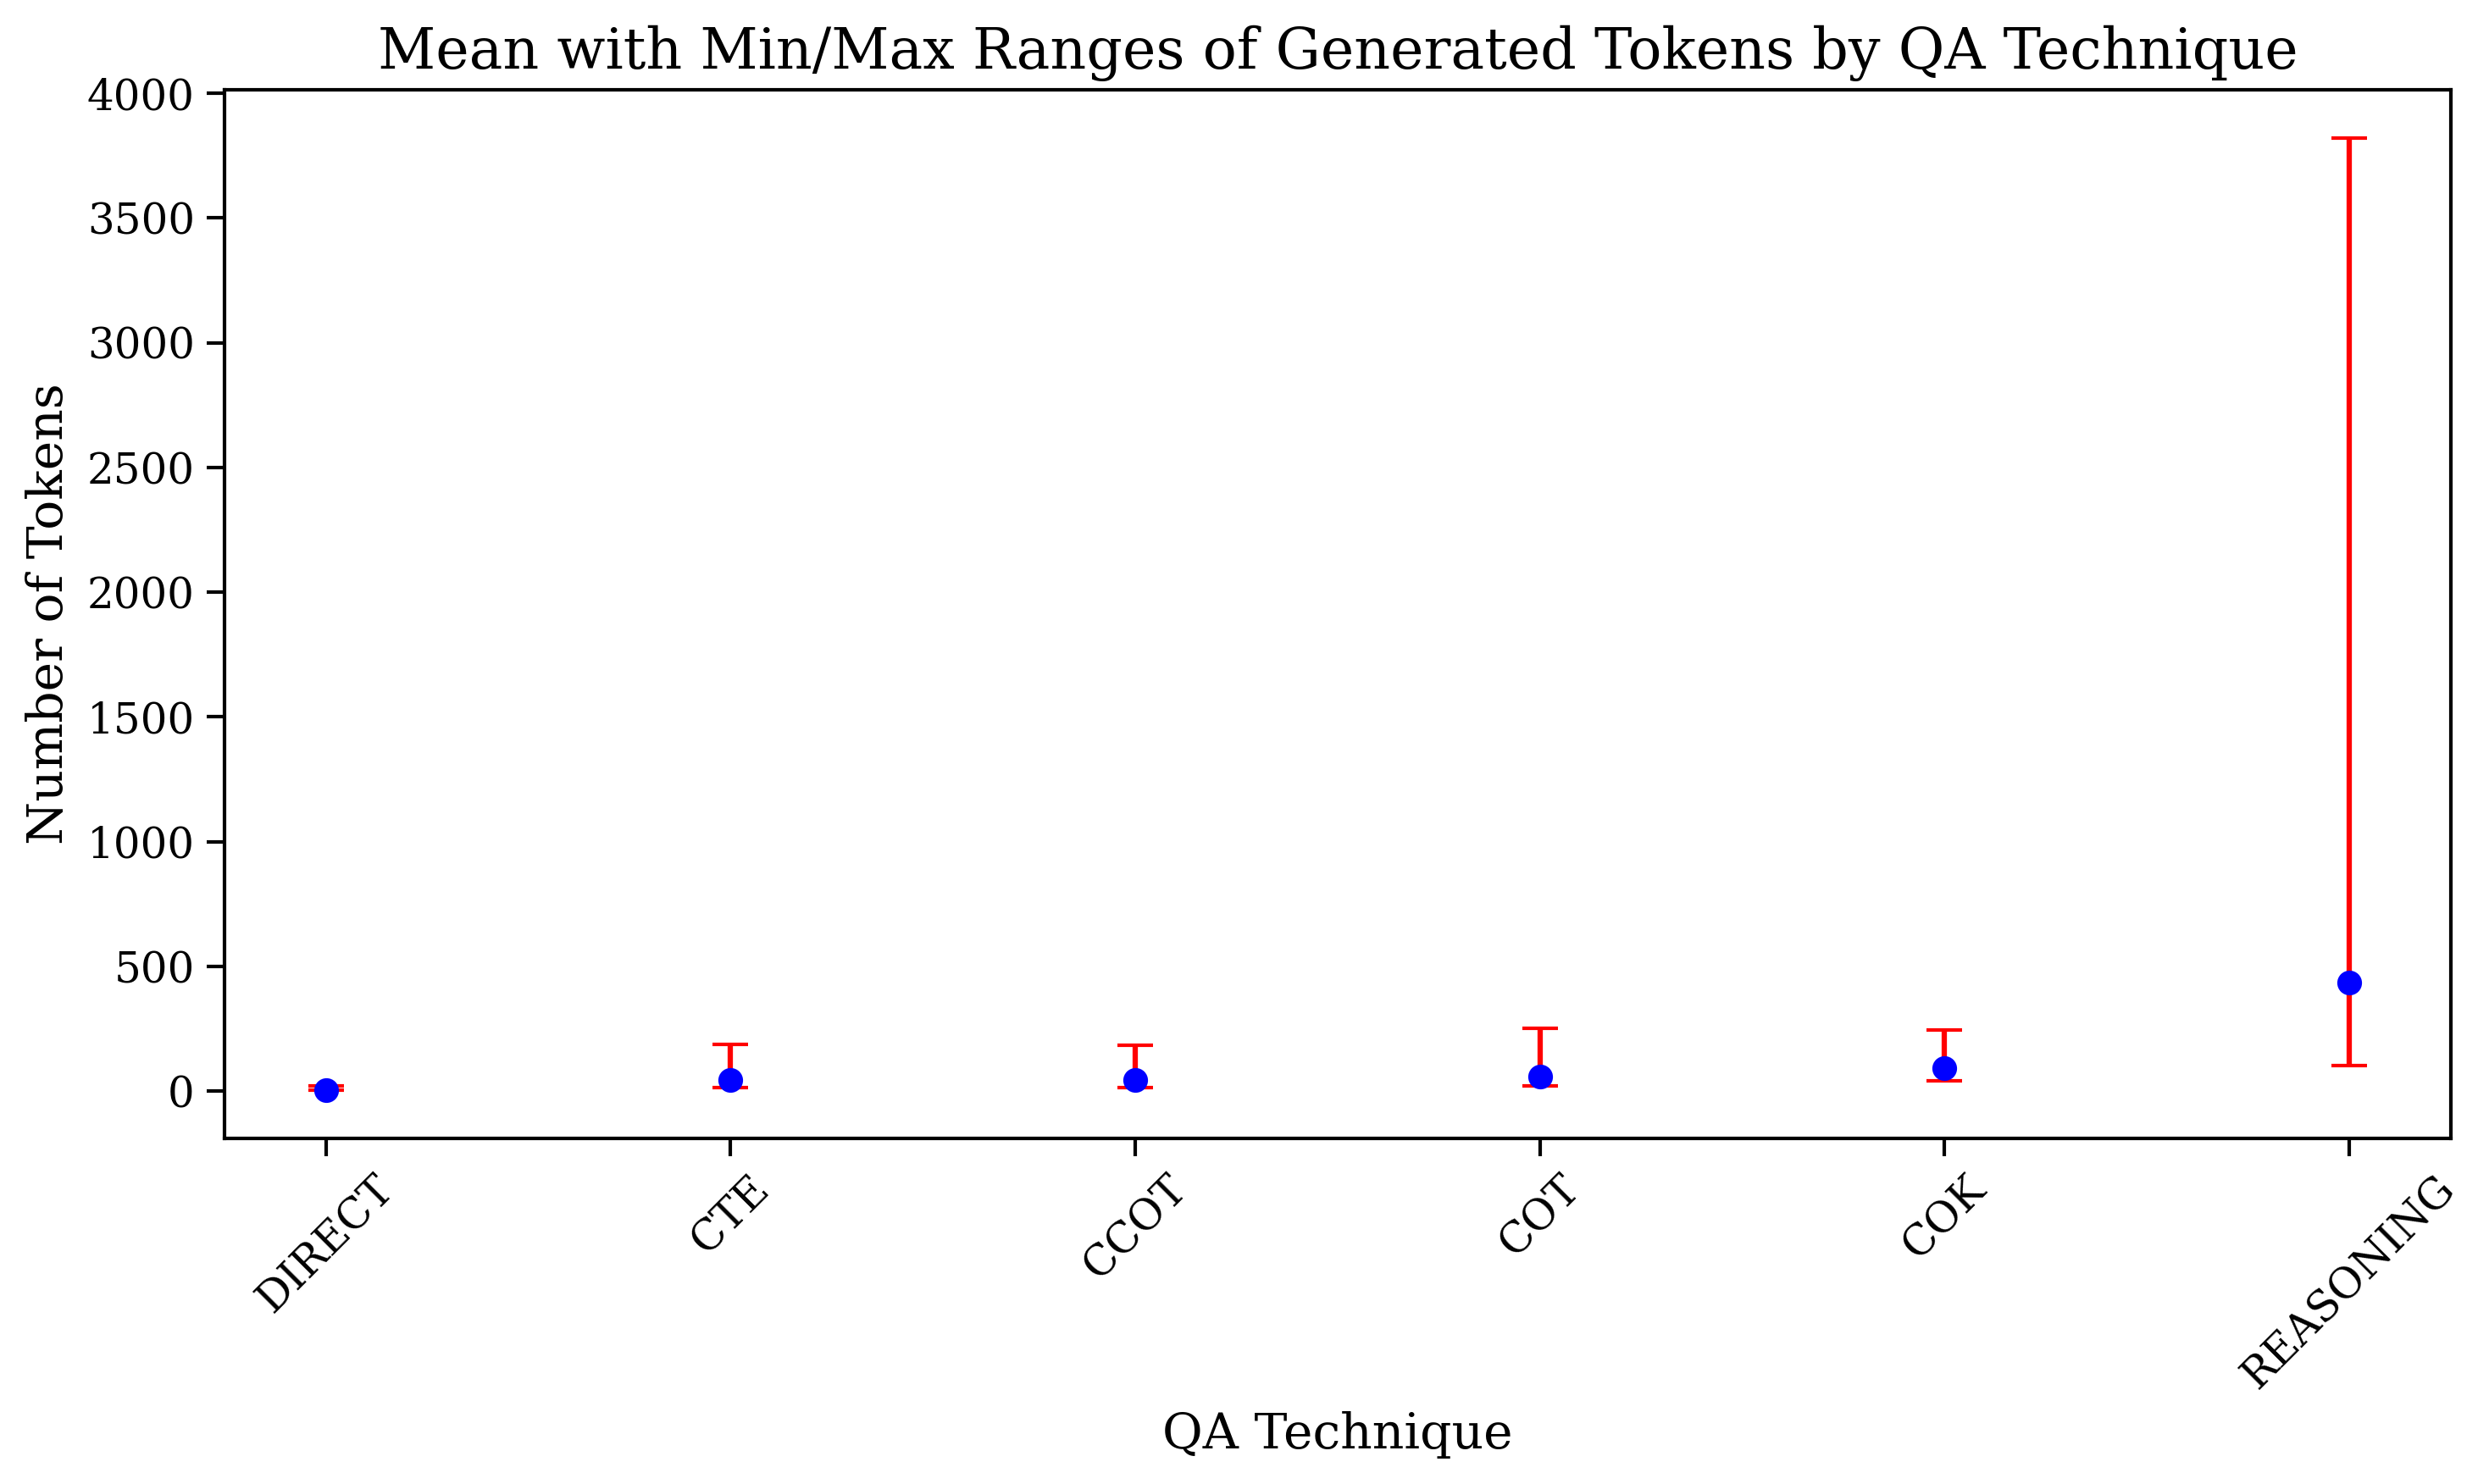

In [8]:
plt.figure(figsize=(10, 6))
plt.errorbar(data["Technique"], data["Mean Tokens"], 
             yerr=[data["Mean Tokens"] - data["Min Tokens"], data["Max Tokens"] - data["Mean Tokens"]],
             fmt='o', capsize=5, ecolor='red', color='blue')
plt.title("Mean with Min/Max Ranges of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


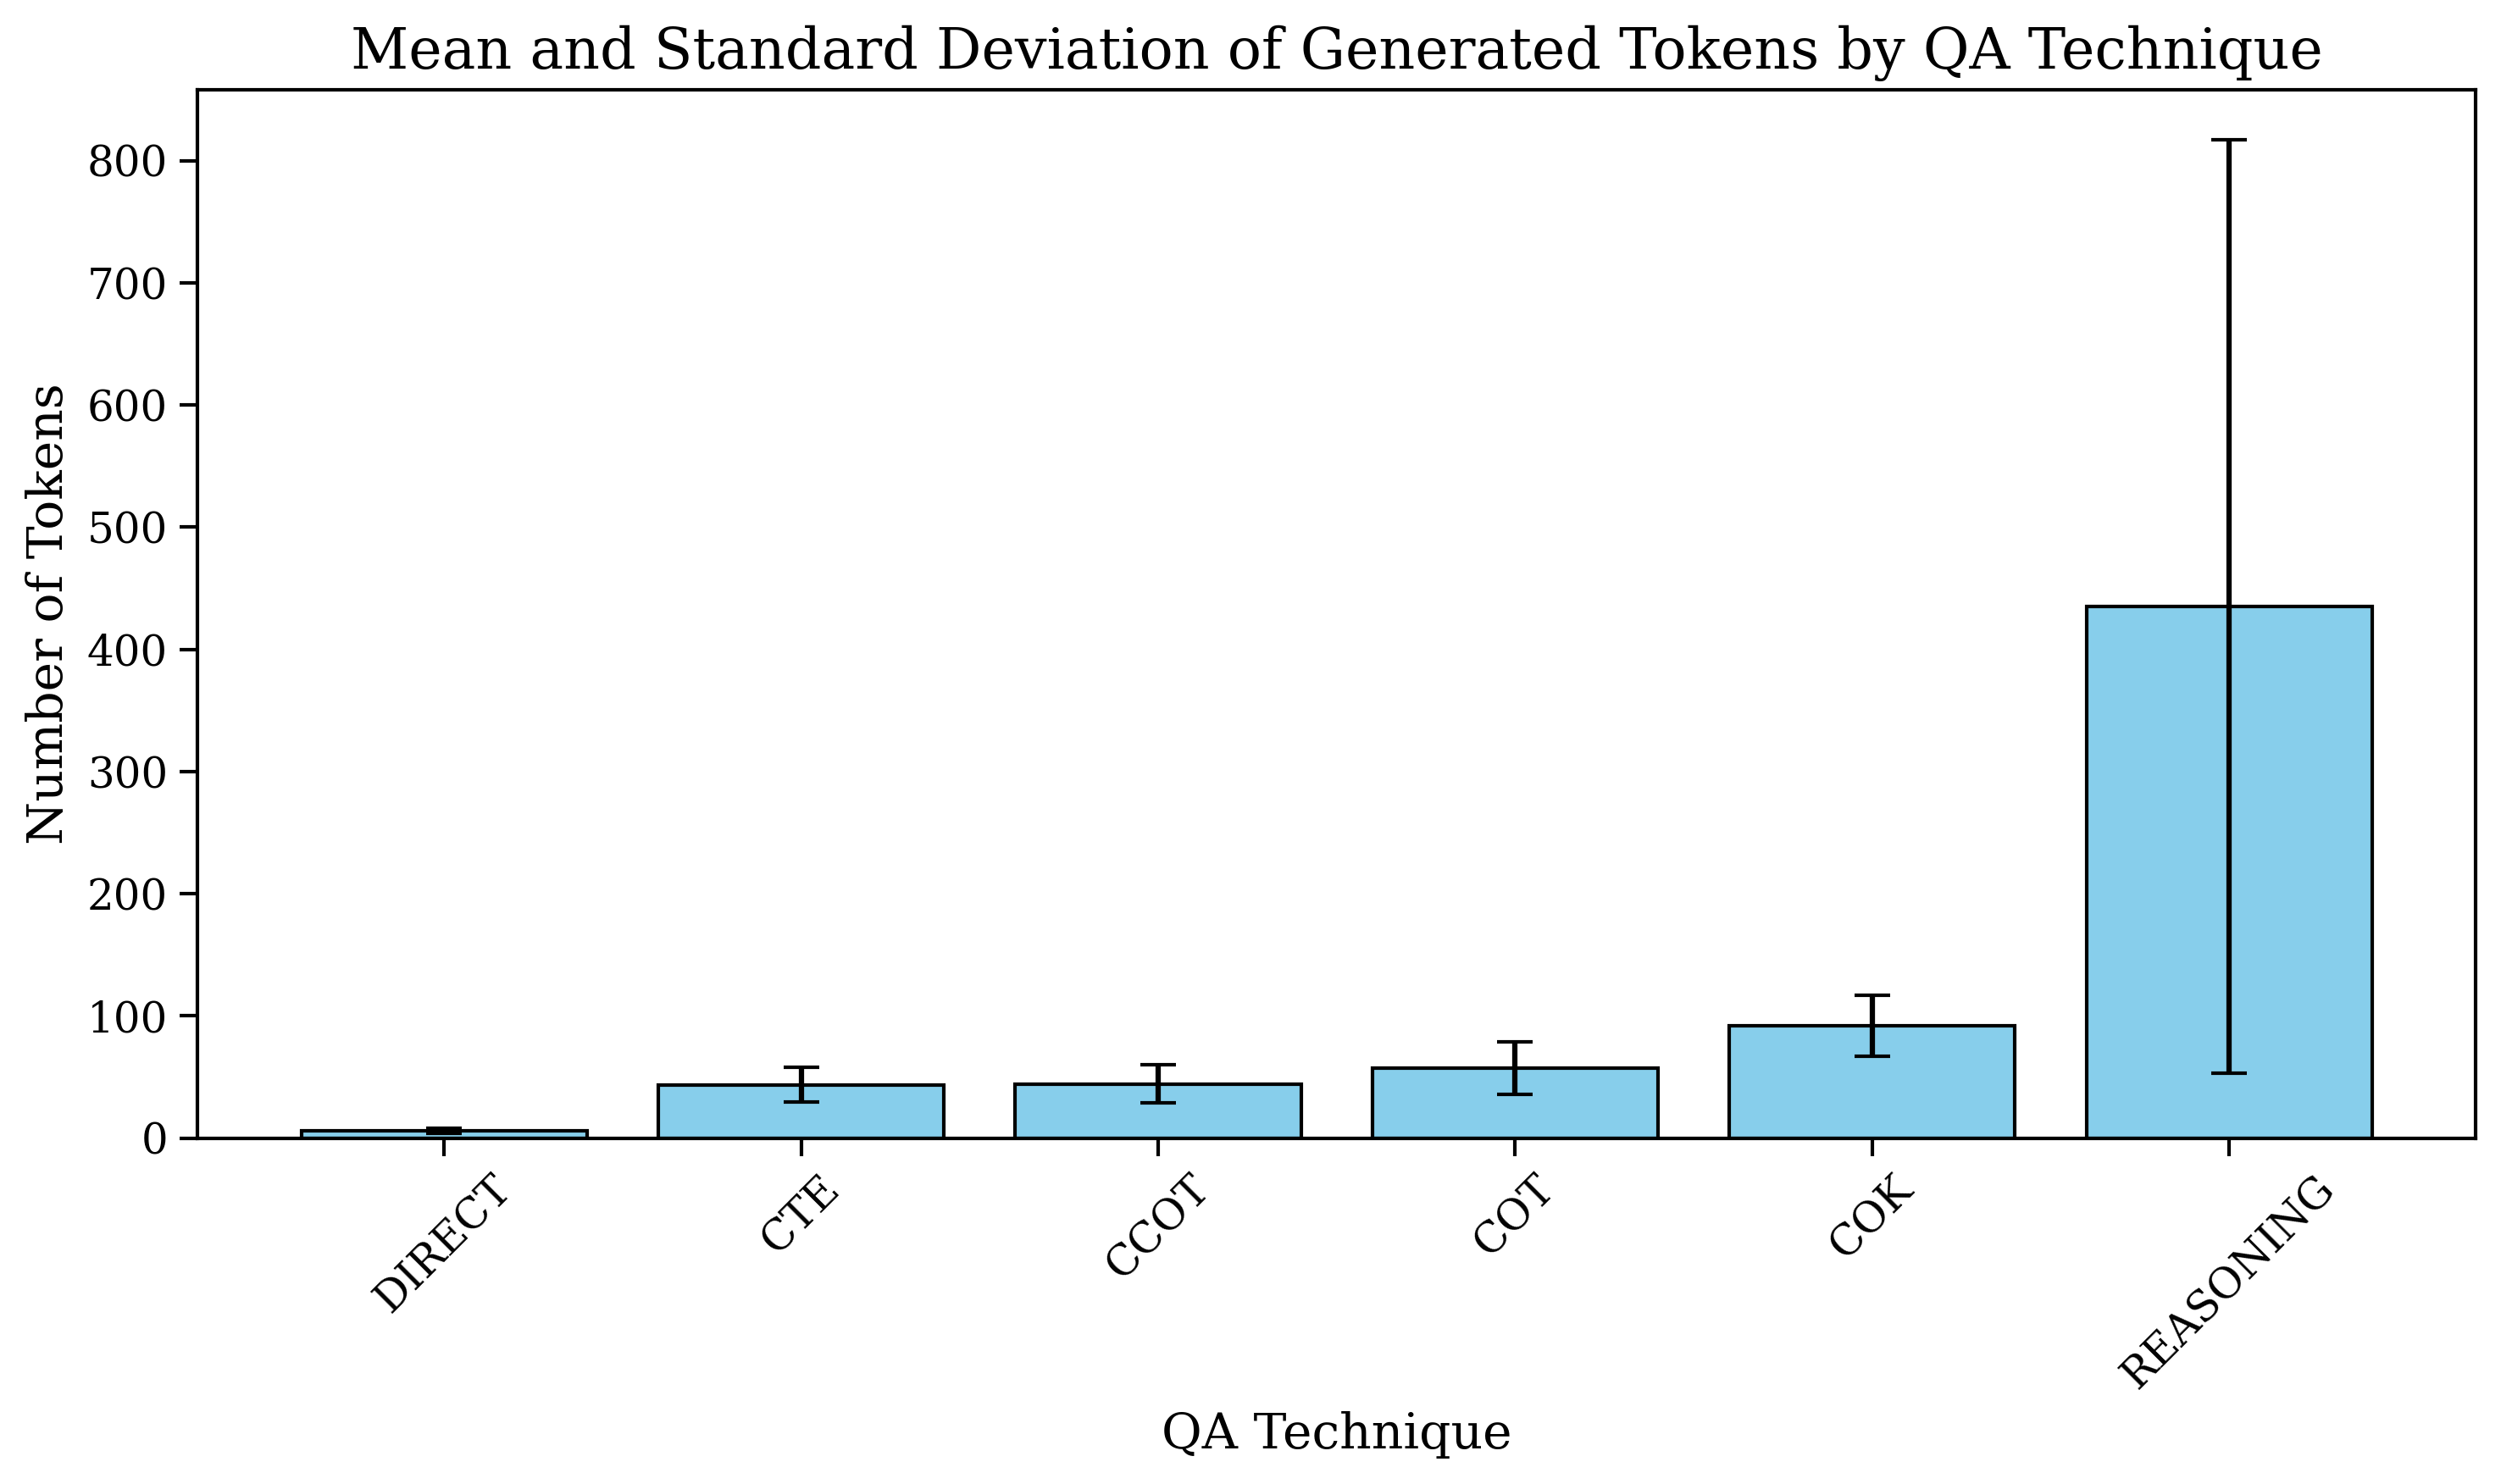

In [9]:
# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(data["Technique"], data["Mean Tokens"], 
        yerr=data["Std Tokens"], capsize=5, 
        color='skyblue', edgecolor='black')
plt.title("Mean and Standard Deviation of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


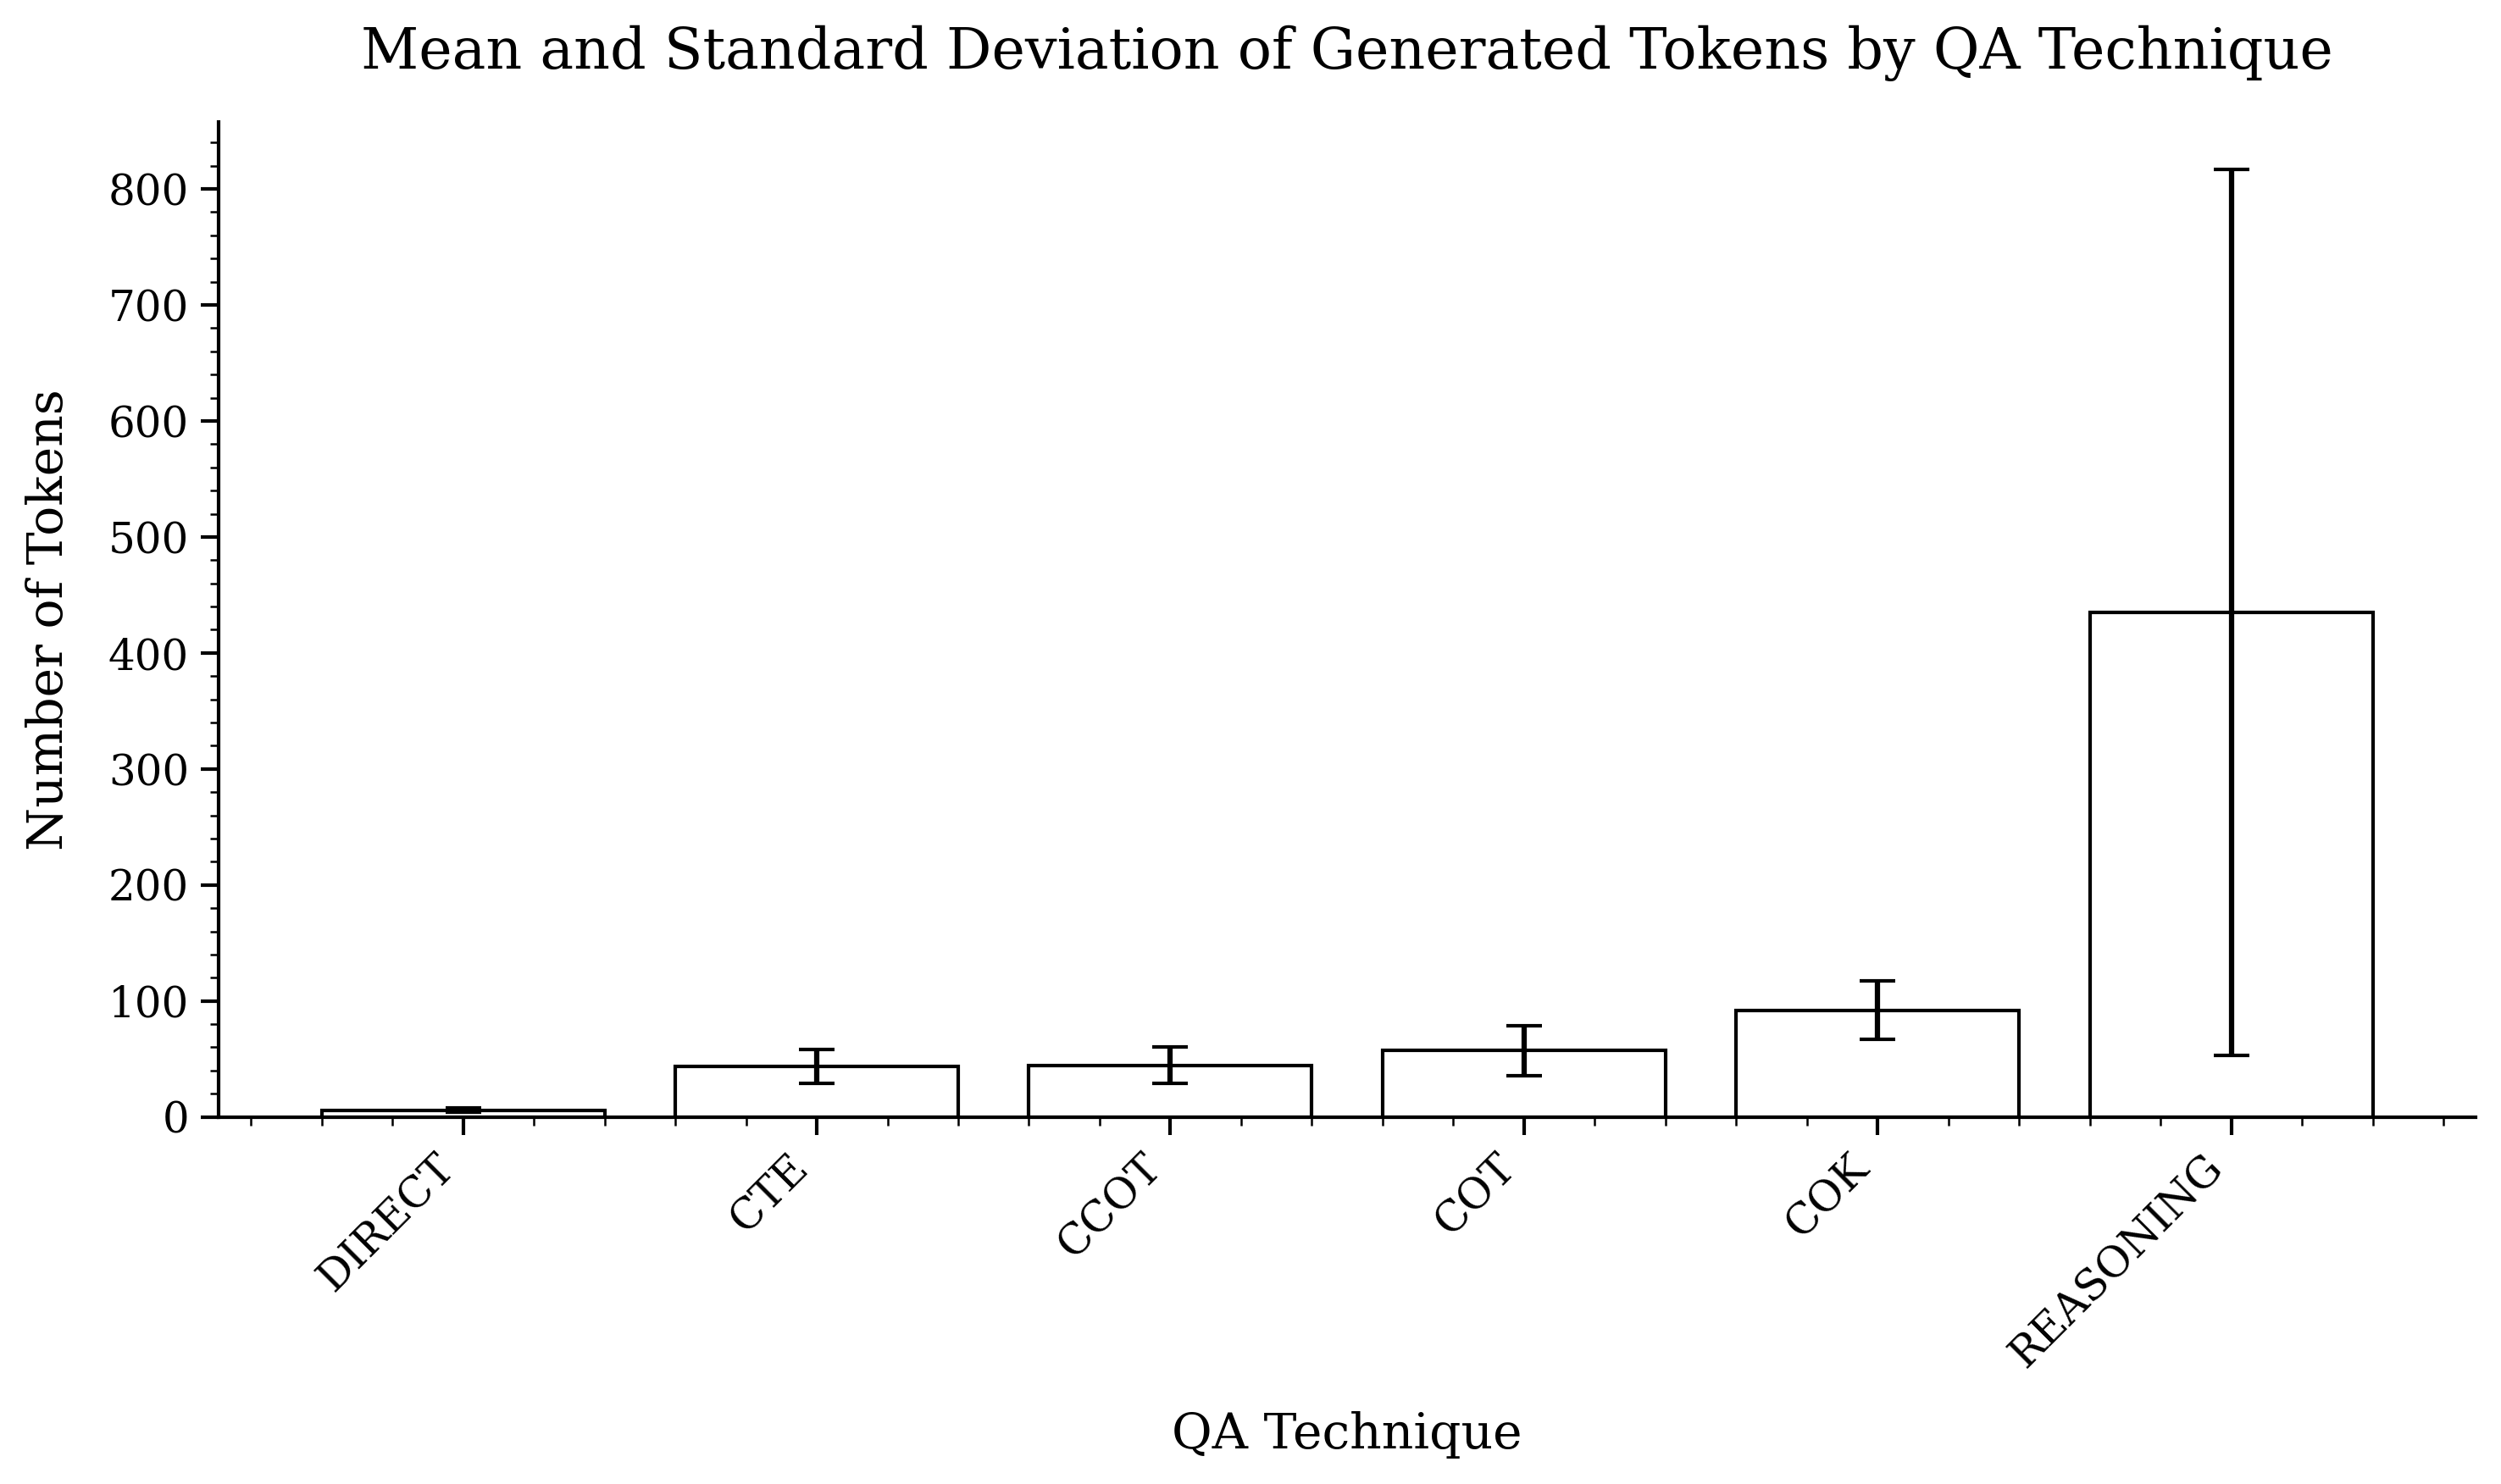

In [10]:
# Create a bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(data["Technique"], data["Mean Tokens"], 
              yerr=data["Std Tokens"], capsize=5, 
              color='white', edgecolor='black', linewidth=1)

# Set titles and labels with appropriate font sizes
ax.set_title("Mean and Standard Deviation of Generated Tokens by QA Technique", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Number of Tokens", labelpad=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Enable minor ticks for additional precision
ax.minorticks_on()

# Adjust layout for publication quality
plt.tight_layout()

# Show or save the figure as needed (e.g., plt.savefig("figure.png"))
plt.show()


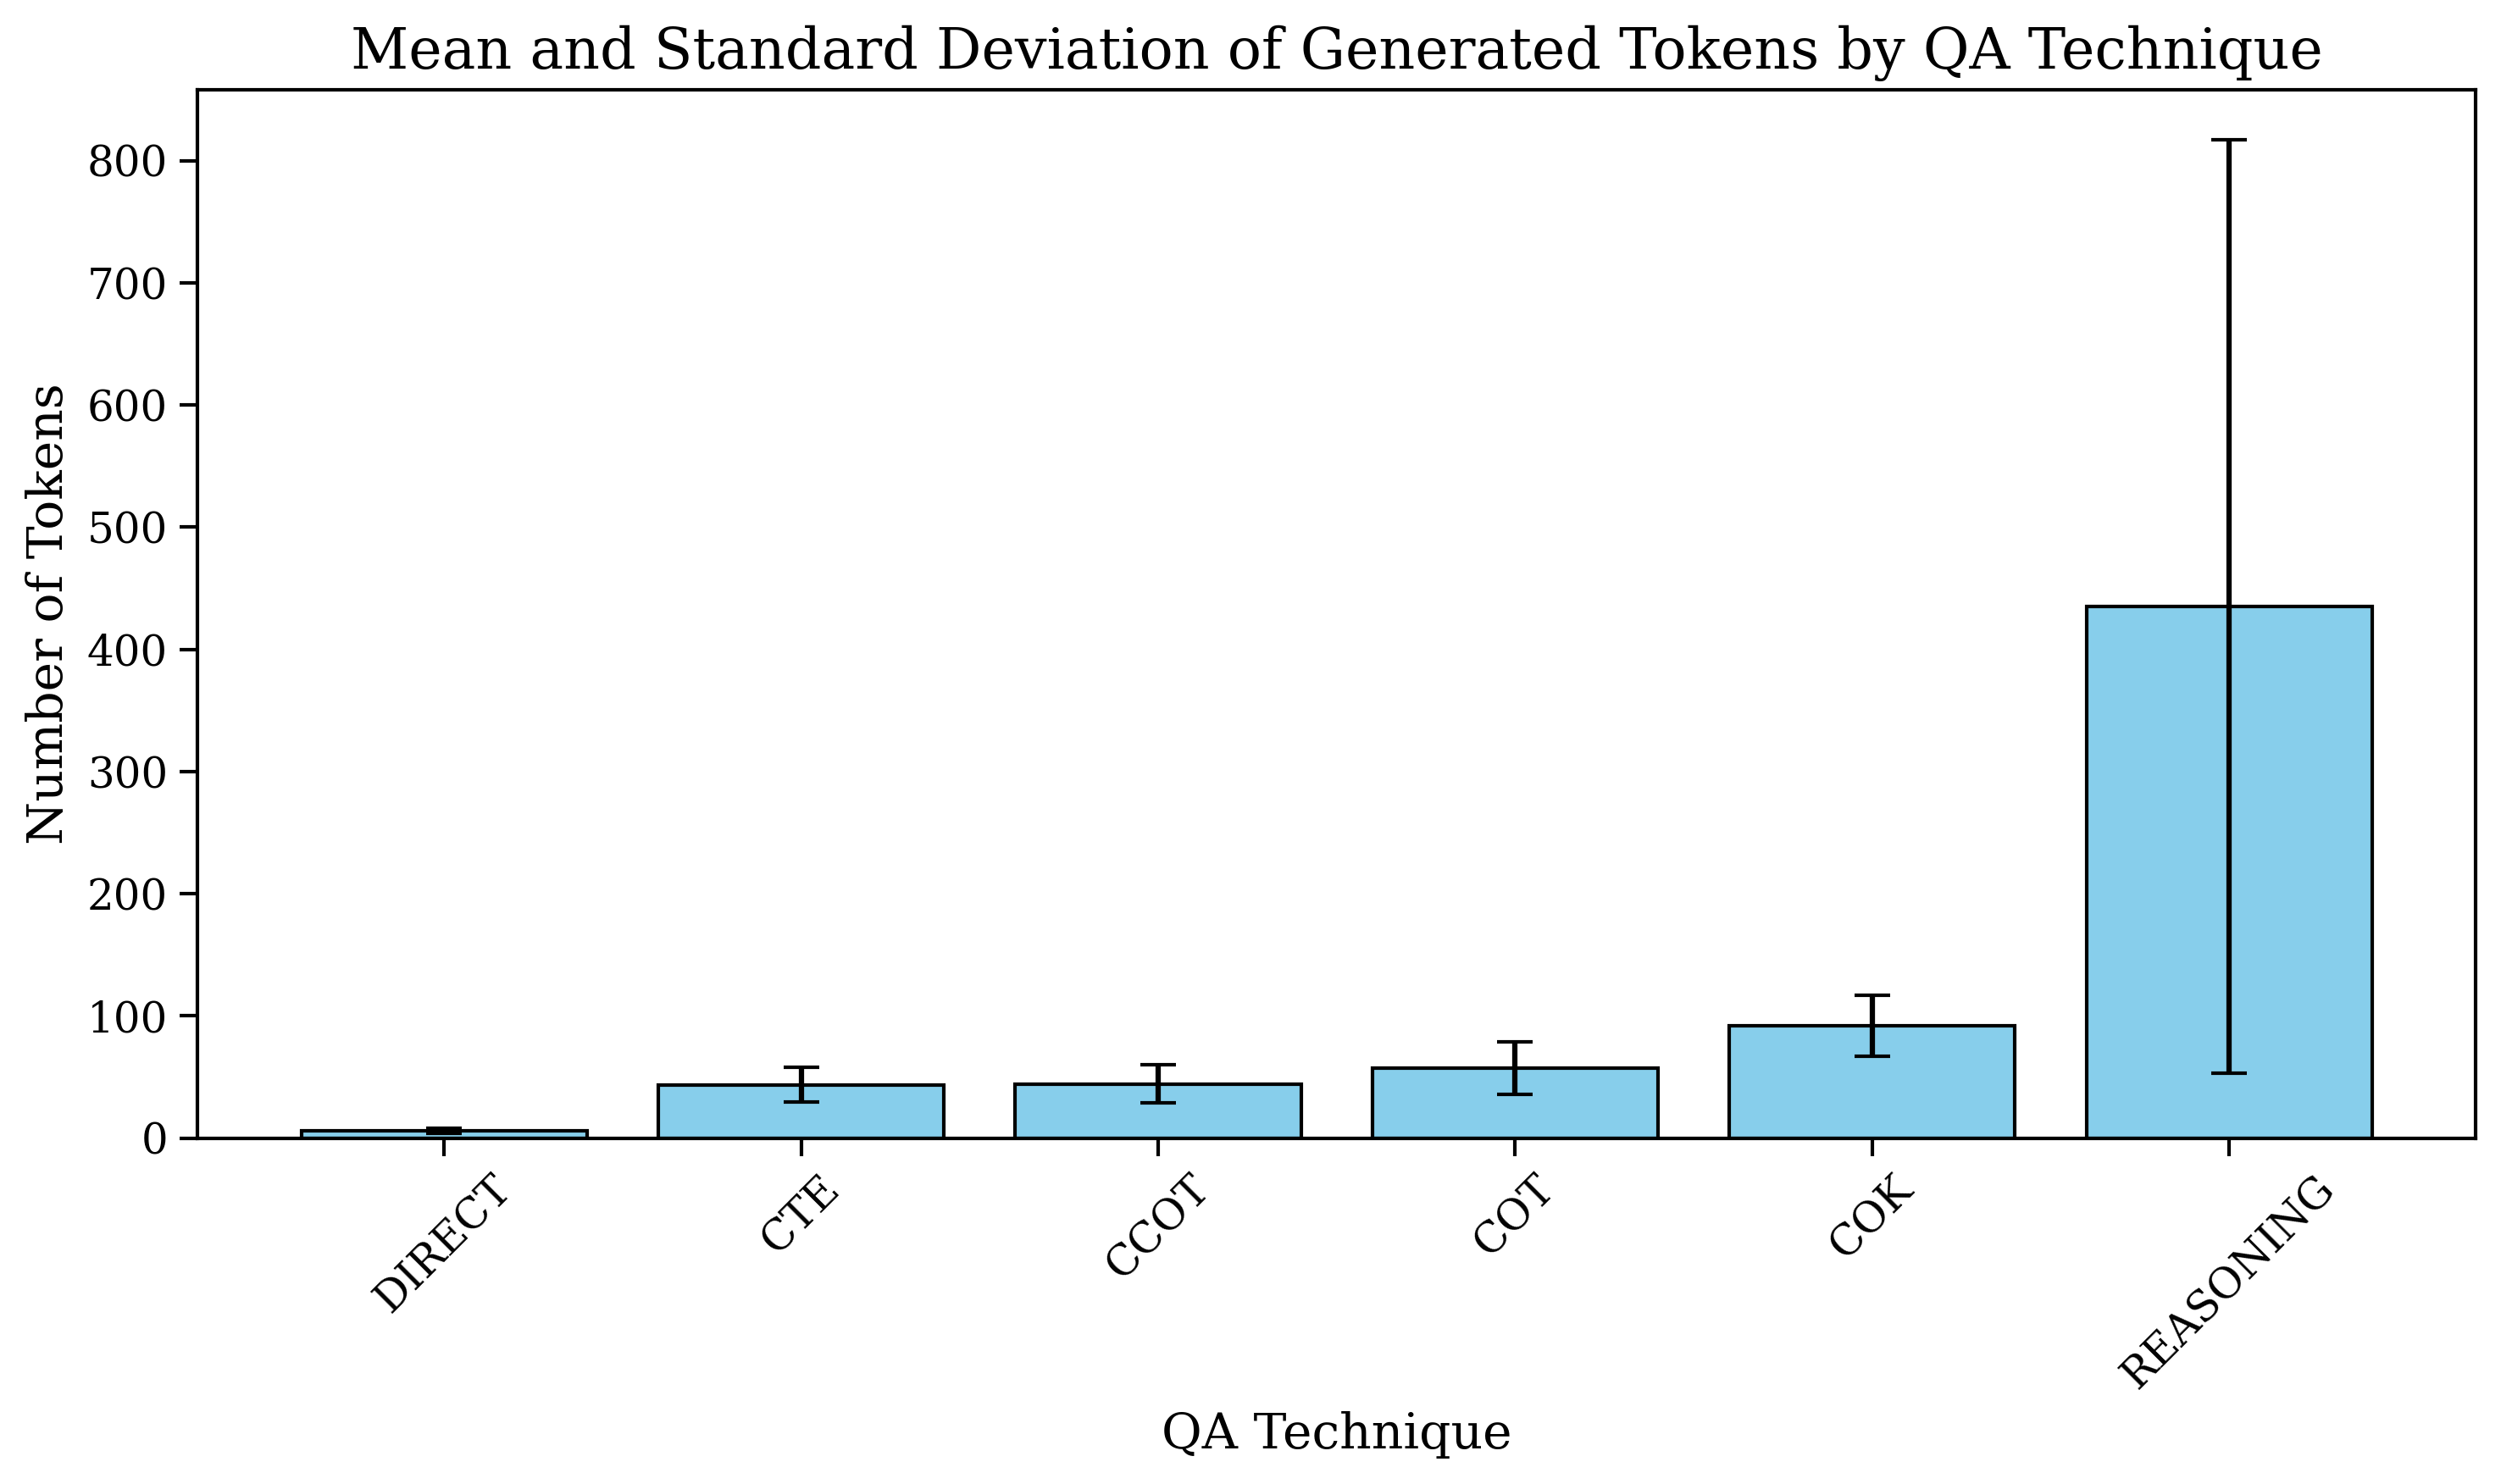

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(data["Technique"], data["Mean Tokens"], 
        yerr=data["Std Tokens"], capsize=5, 
        color='skyblue', edgecolor='black')
plt.title("Mean and Standard Deviation of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'DIRECT'),
  Text(1, 0, 'CTE'),
  Text(2, 0, 'CCOT'),
  Text(3, 0, 'COT'),
  Text(4, 0, 'COK'),
  Text(5, 0, 'REASONING')])

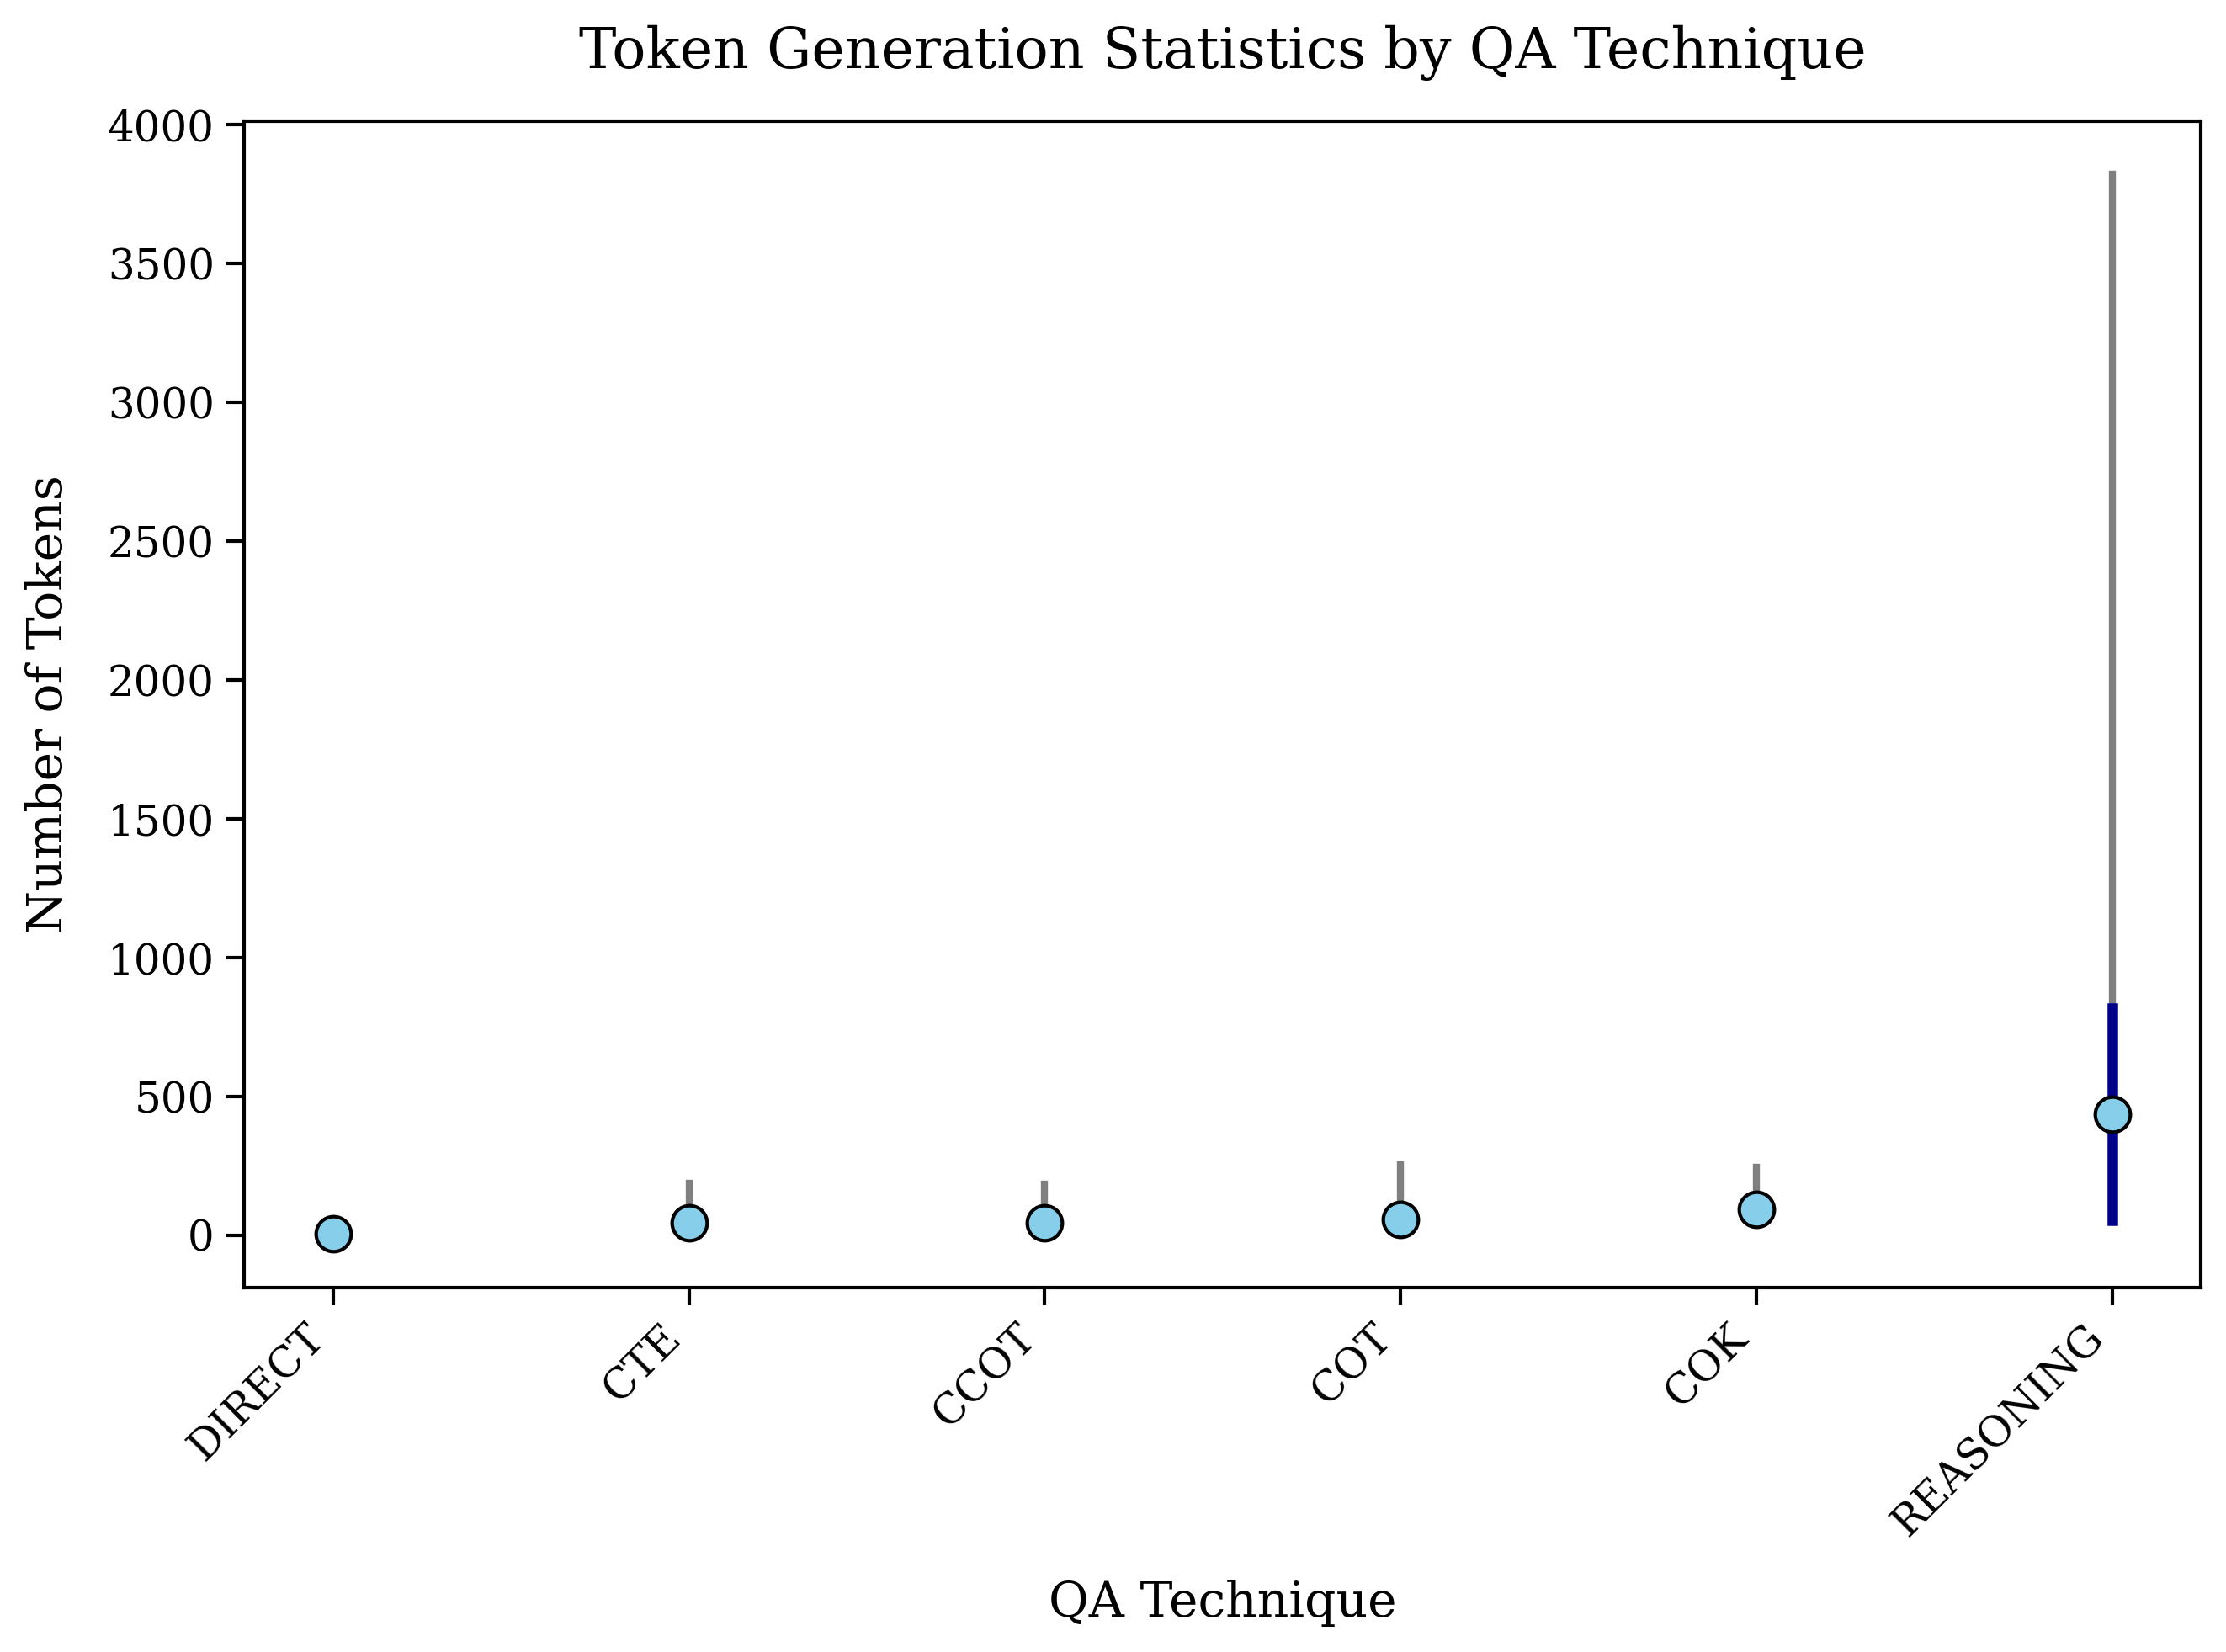

In [12]:
# Create the lollipop chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a vertical line for each technique from min to max
for idx, row in data.iterrows():
    ax.plot([row["Technique"], row["Technique"]], [row["Min Tokens"], row["Max Tokens"]],
            color='grey', lw=2, zorder=1)

# Plot mean points with error bars (mean ± std) as small horizontal ticks
for idx, row in data.iterrows():
    # Vertical line for std range centered on the mean
    ax.plot([row["Technique"], row["Technique"]],
            [row["Mean Tokens"] - row["Std Tokens"], row["Mean Tokens"] + row["Std Tokens"]],
            color='darkblue', lw=3, zorder=2)
    # Marker at the mean
    ax.scatter(row["Technique"], row["Mean Tokens"], 
               color='skyblue', edgecolor='black', s=100, zorder=3)

# Set titles and labels
ax.set_title("Token Generation Statistics by QA Technique", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Number of Tokens", labelpad=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove top and right


/tmp/ipykernel_1717216/693157504.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Technique", y="Token Count", data=synthetic_df, palette="pastel", inner="quartile")


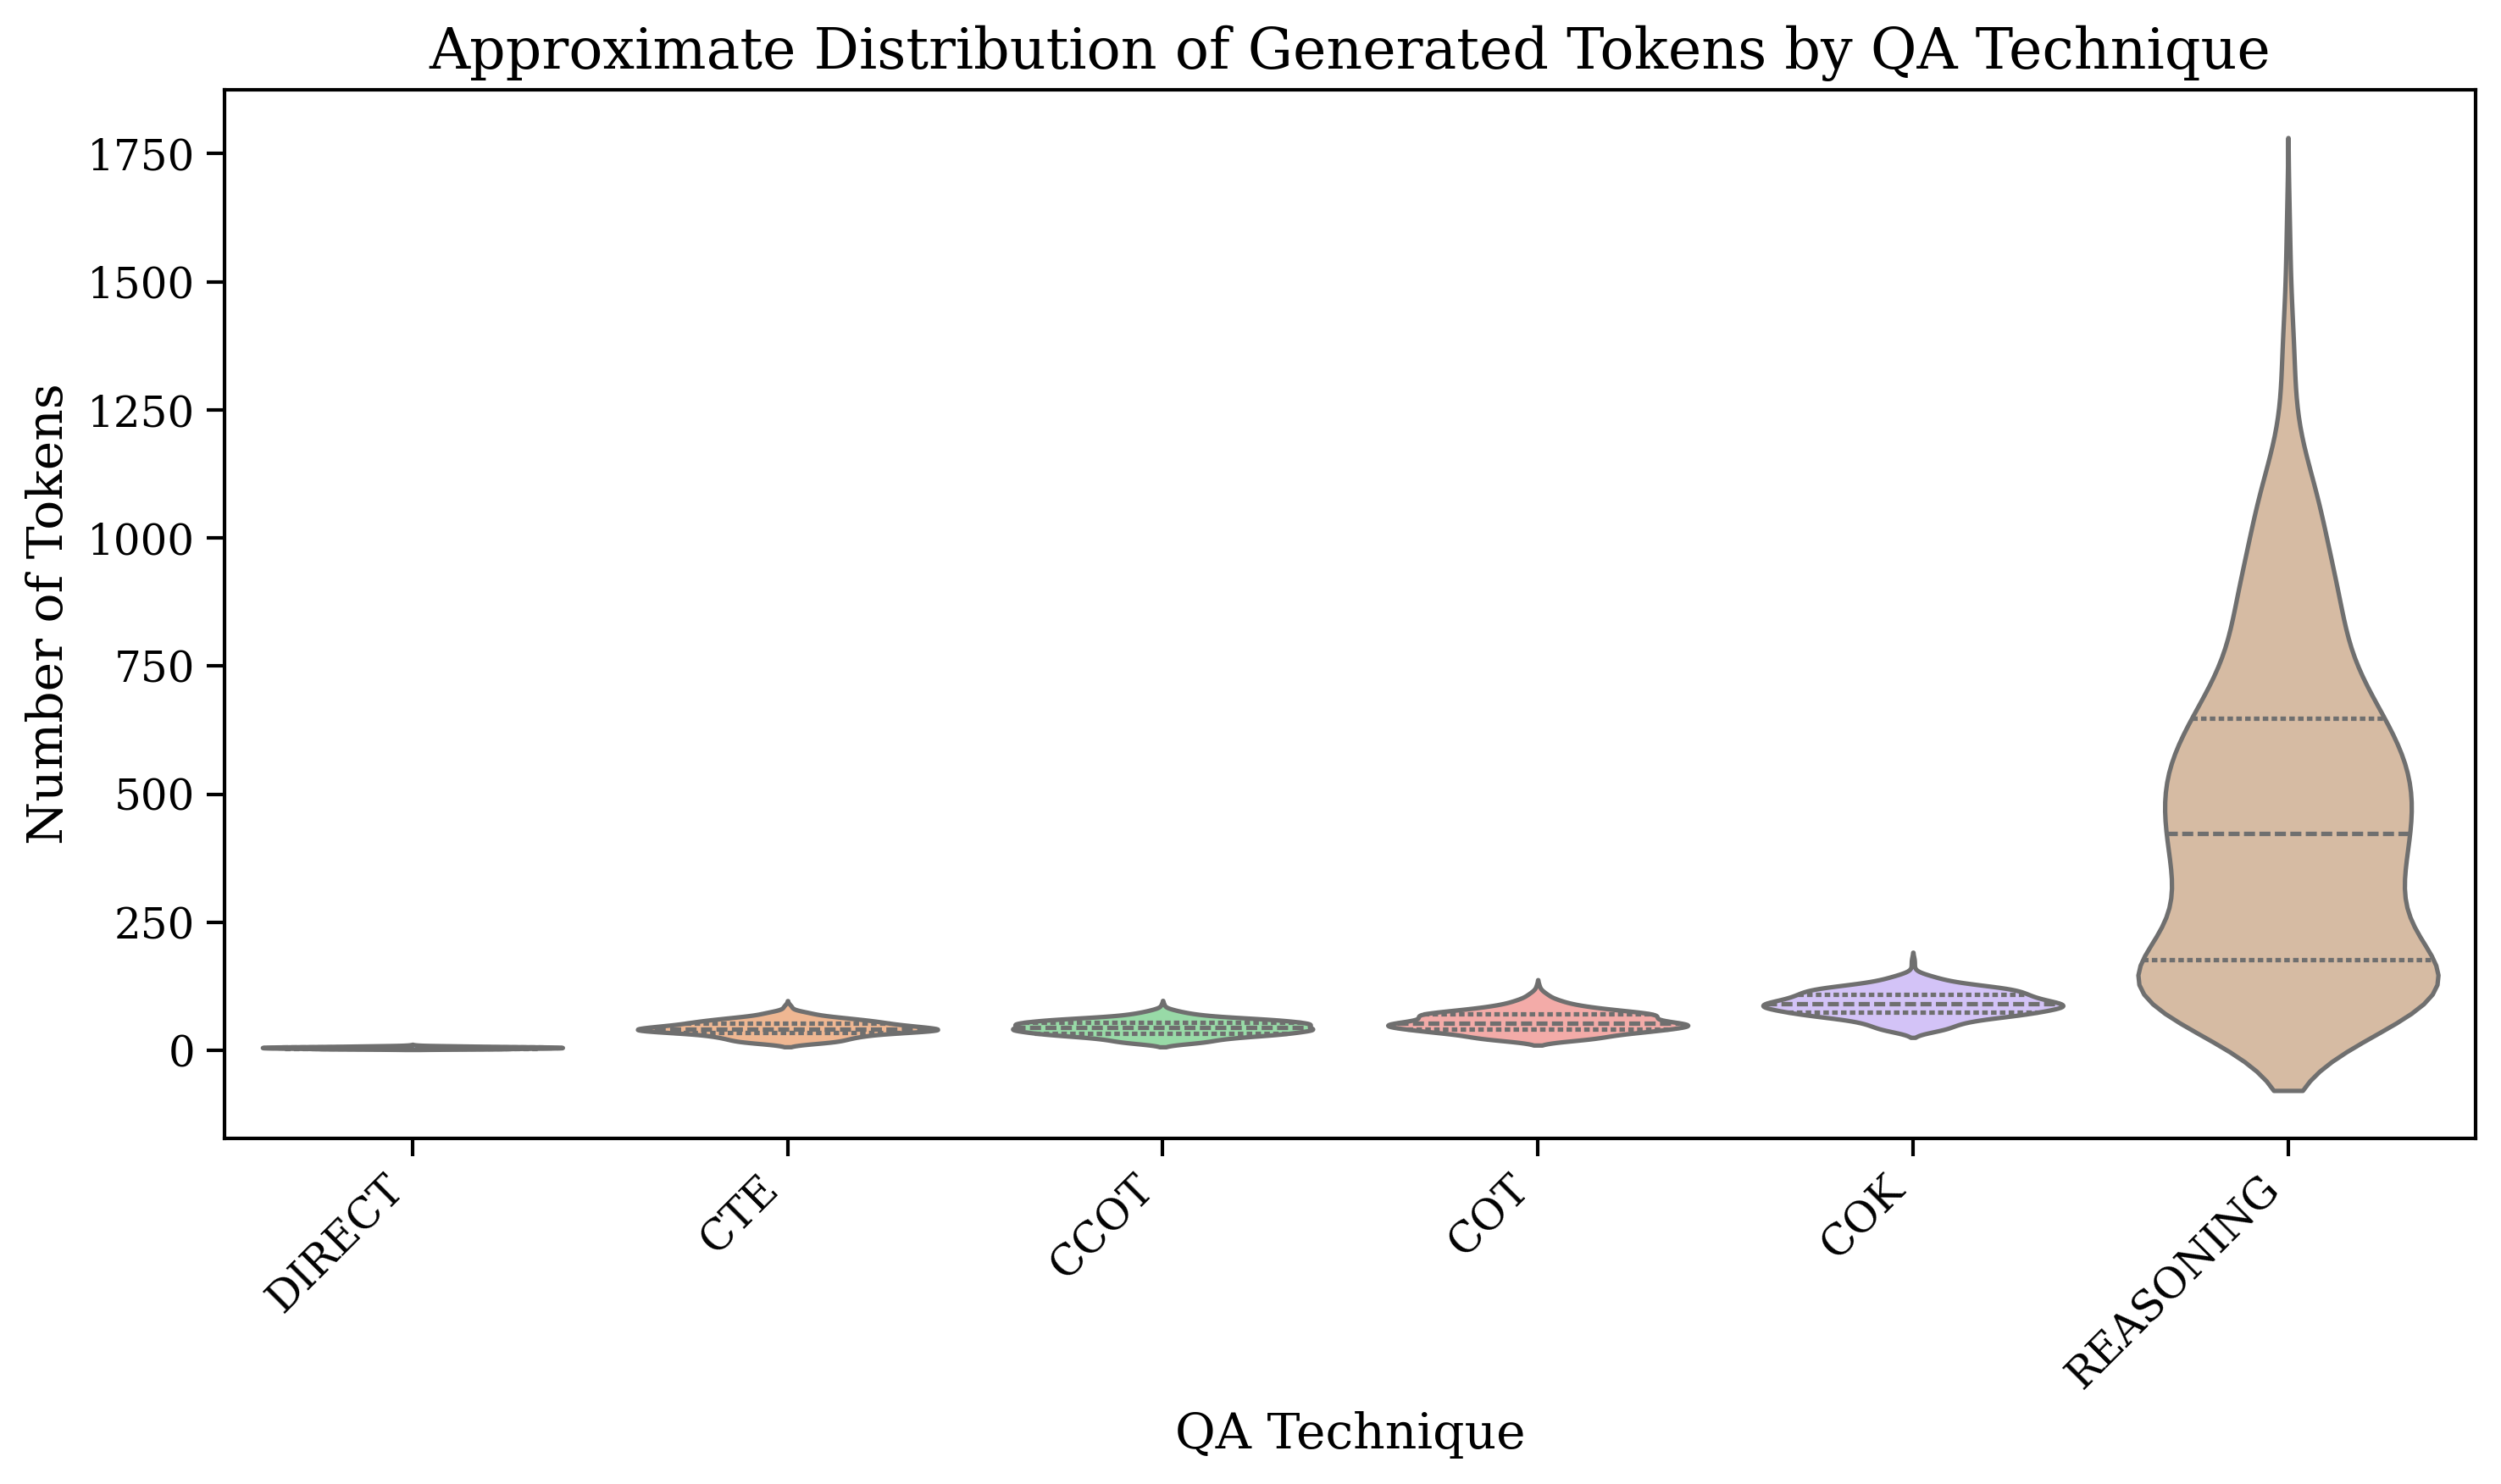

In [13]:
# Create synthetic data assuming normal distribution for each technique
synthetic_data = []
for _, row in data.iterrows():
    # Generate 500 sample points from a normal distribution with given mean and std
    samples = np.random.normal(loc=row["Mean Tokens"], scale=row["Std Tokens"], size=500)
    # Clip to min and max bounds
    samples = np.clip(samples, row["Min Tokens"], row["Max Tokens"])
    synthetic_data.extend(zip([row["Technique"]]*len(samples), samples))

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=["Technique", "Token Count"])

# Plot violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Technique", y="Token Count", data=synthetic_df, palette="pastel", inner="quartile")
plt.title("Approximate Distribution of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


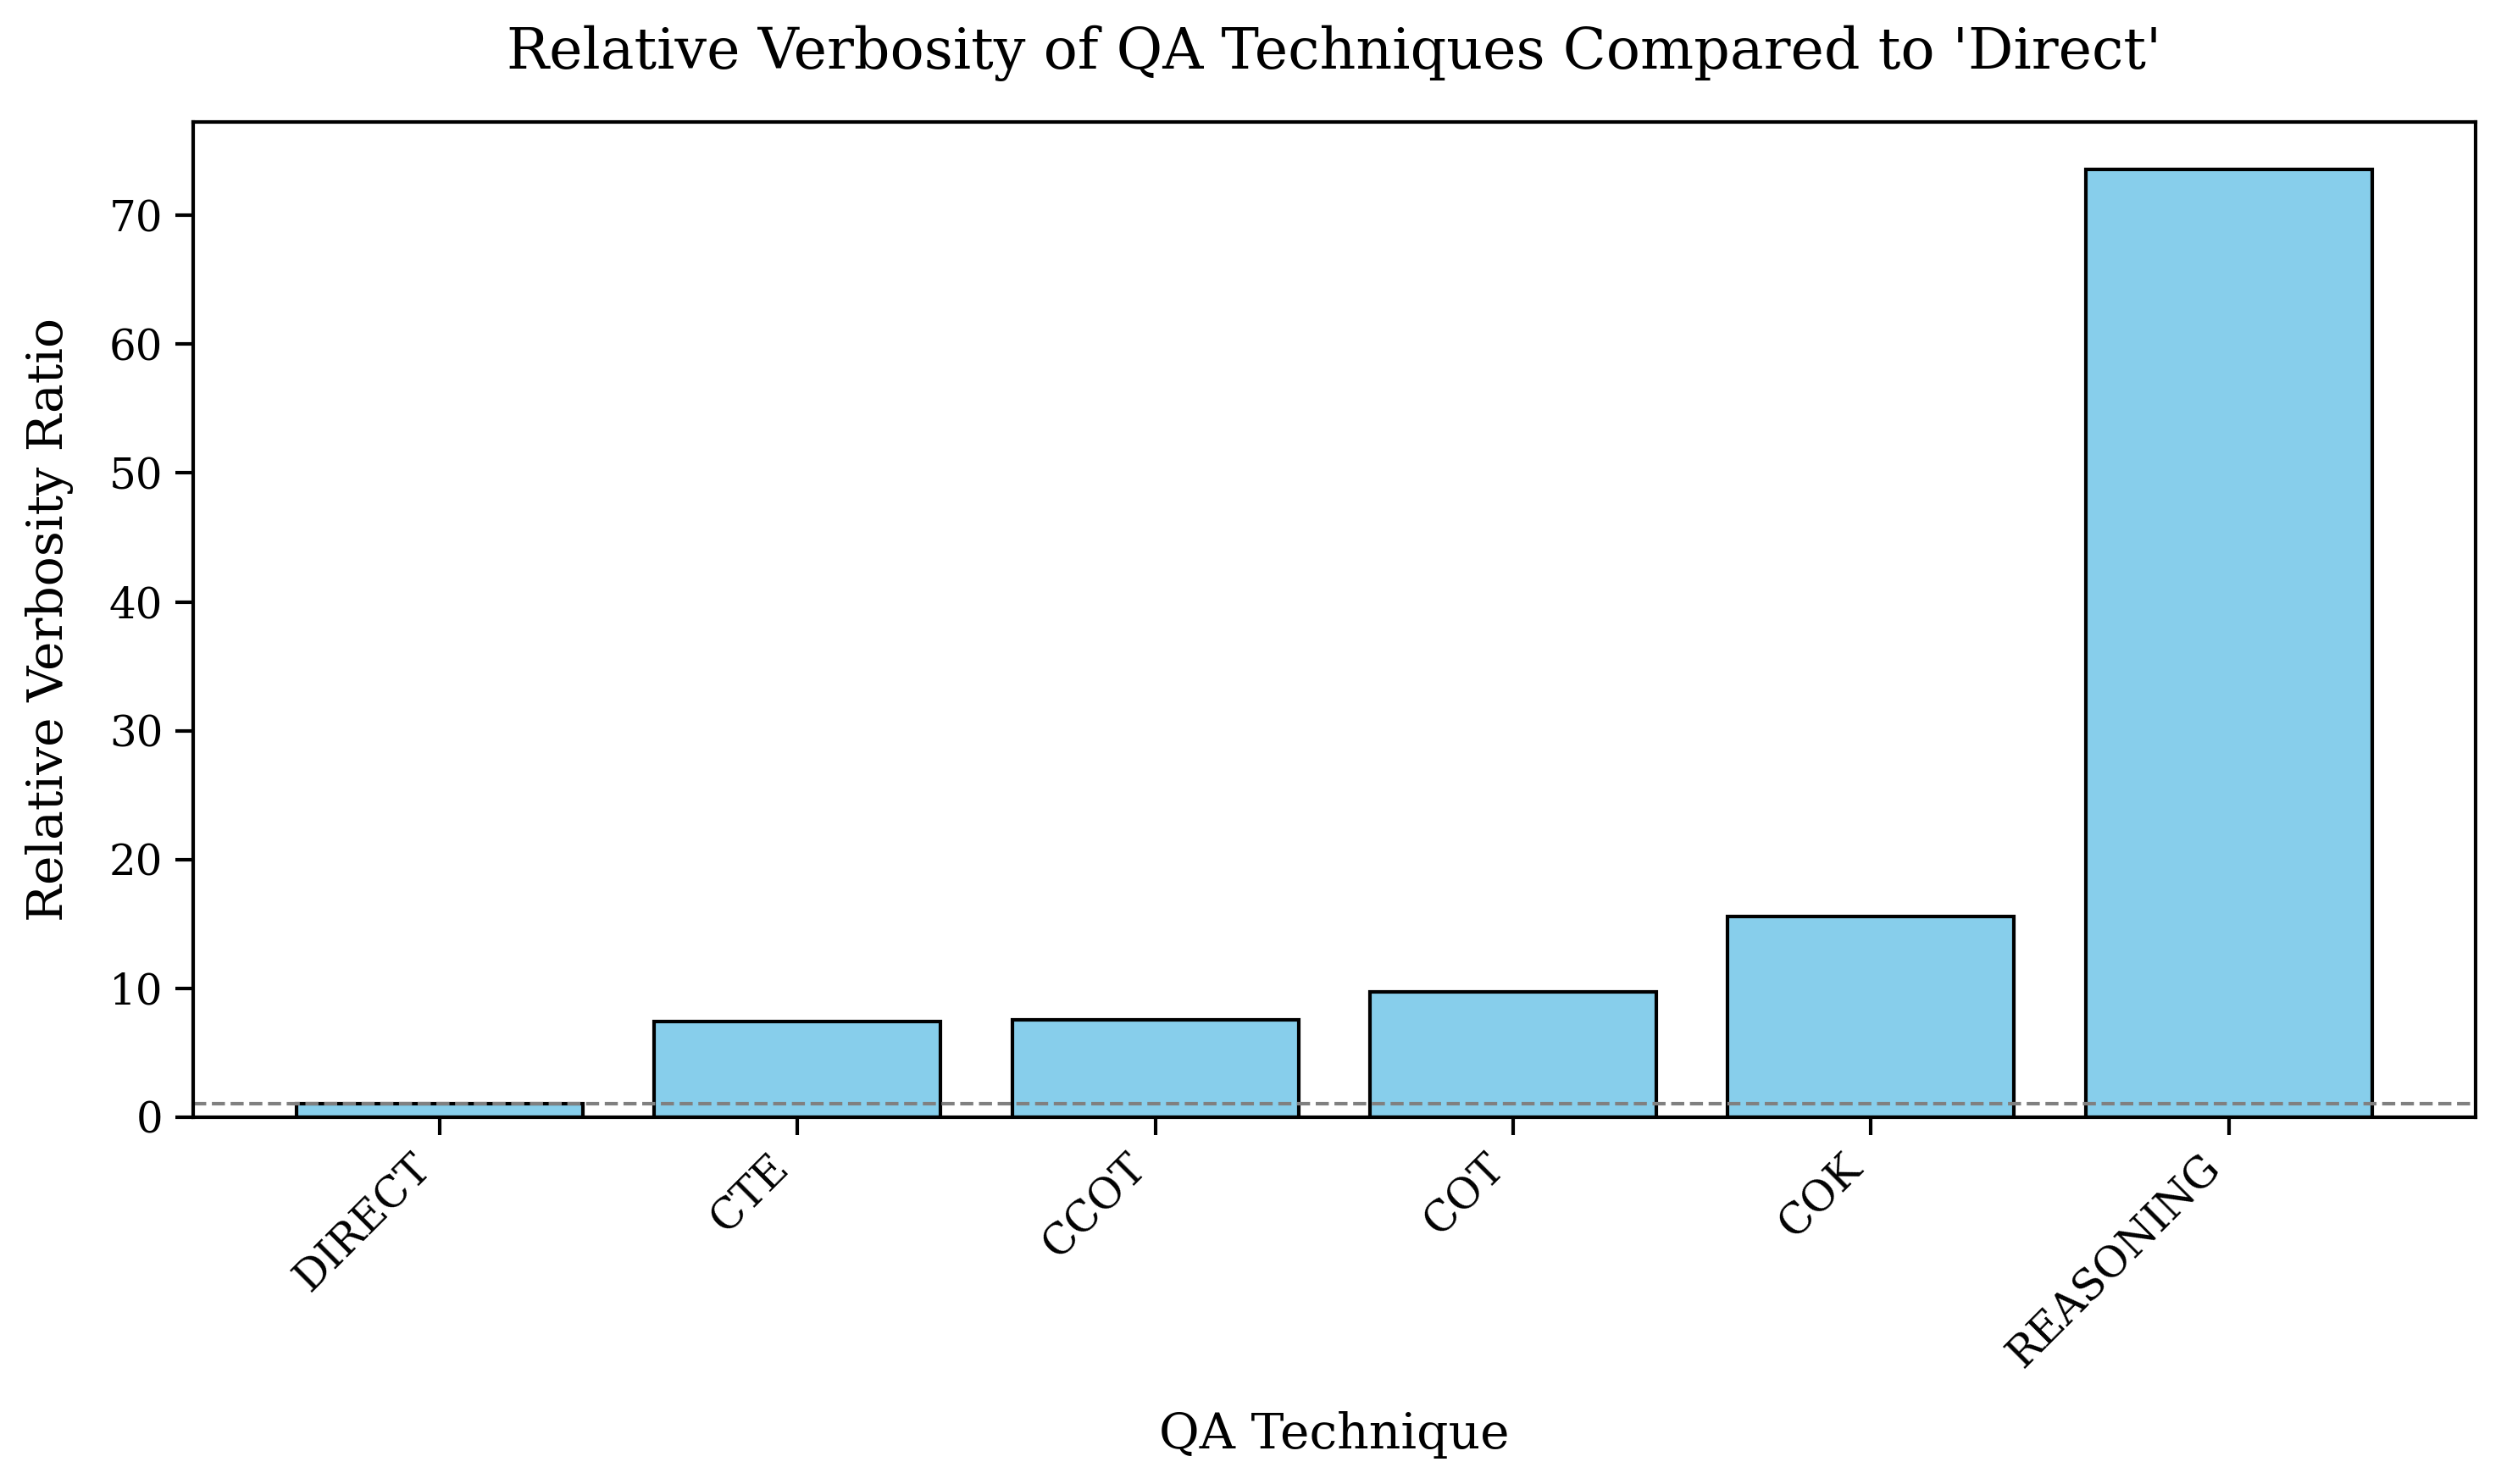

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    data["Technique"], 
    data["Relative Verbosity Ratio"], 
    color='skyblue', 
    edgecolor='black', 
    linewidth=1
)

# Highlight the Direct technique bar (which should have a ratio of 1.0)
for bar, tech in zip(bars, data["Technique"]):
    if tech == "Direct":
        bar.set_color('lightgreen')
        bar.set_edgecolor('darkgreen')

# Add a horizontal reference line at ratio = 1
ax.axhline(1, color='grey', linestyle='--', linewidth=1)

# Set titles and labels
ax.set_title("Relative Verbosity of QA Techniques Compared to 'Direct'", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Relative Verbosity Ratio", labelpad=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
